In [13]:
import pandas as pnd
import matplotlib as mlp

<div style="font-size:18pt; padding-top:20px; text-align:center">ЗАДАНИЕ. <b>Индекс реальной зарплаты</b></div><hr>
<div style="text-align:right;">Папулин С.Ю. <span style="font-style: italic;font-weight: bold;">(papulin.study@yandex.ru)</span></div>

<a name="0"></a>
<div><span style="font-size:14pt; font-weight:bold">Содержание</span>
    <ol>
        <li><a href="#1">Расчет индекса реальной заработной платы</a></li>
        <li><a href="#2">Варианты</a></li>
    </ol>
</div>

Подключение стилей оформления

In [10]:
%%html
<link href="css/style.css" rel="stylesheet" type="text/css">

SyntaxError: invalid syntax (<ipython-input-10-c7af6ab6168e>, line 3)

<a name="1"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">1. Расчет индекса реальной заработной платы</div>
    	<div style="display:table-cell; width:20%; text-align:center; background-color:whitesmoke; border:1px solid lightgrey"><a href="#0">К содержанию</a></div>
    </div>
</div>

<div class="msg-block msg-imp">
  <div class="msg-text-imp">
      <p>СРОК СДАЧИ: до <b>-</b></p>
      <p style="margin:0px">ПОСЛЕ СРОКА: первая неделя <b>-</b>, вторая неделя и далее до конца модуля <b>-</b>
      </p>
  </div>
</div>

<p>Среднемесячная начисленная заработная плата (руб.) - $НЗП$<br>
Среднемесячная начисленная заработная плата базового периода (руб.) - $НЗПБ$<br>
Индекс номинальной заработной платы (%) - $И_{НЗП,\%}$<br>
Индекс потребительских цен (%) - $И_{ПЦ,\%}$<br>
Индекс реальной заработной платы (%) - $И_{РЗП,\%}$</p>

$$И_{НЗП,\%}=\frac{НЗП}{НЗПБ}\cdot 100 $$

$$И_{РЗП,\%}=\frac{И_{НЗП}}{И_{ПЦ}} \cdot 100$$

<a href = "http://www.gks.ru/bgd/free/b00_24/isswww.exe/stg/d000/i000101r.htm">Аналитическая основа, концепции, определения и классификации</a><br>
<a href = "http://www.gks.ru/bgd/free/B00_24/IssWWW.exe/Stg/d000/I000050R.HTM">Динамика среднемесячной номинальной и реальной начисленной заработной платы (2014, 2015)</a>



<p><b>Пример</b> расчета $И_{РЗП}$ за 2014 год</p>

$$НЗП_{2014} = 32495 руб.$$

$$НЗПБ_{2013} = 29792 руб.$$

$$И_{ПЦ,2014,\%}=107.82$$

$$И_{НЗП,2014,\%}=\frac{НЗП_{2014}}{НЗПБ_{2013}} \cdot 100= 109.07$$

$$И_{РЗП,2014}=\frac{И_{НЗП,2014,\%}}{И_{ПЦ,2014,\%}}\cdot 100=101.16$$

Реальная заработная плата в 2014 году изменилась по отношению к 2013 году на 
$$\bigtriangleup И_{РЗП,2014} = И_{РЗП,2014} - 100 = +1.16\%$$

In [70]:
nom_salary_2014 = 32495
nom_salary_base_2013 = 29792
i_price_2014 = 107.82 / 100
i_nom_salary = nom_salary_2014 / nom_salary_base_2013
i_real_salary_2014 = i_nom_salary / i_price_2014 * 100
dif = i_real_salary_2014 - 100
dif


1.1620343887782383

<p><b>Задача 1.</b> Найти индексы номинальной заработной платы, построить график изменения индекса в процентах (год-изменение индекса в %) </p>

In [72]:
filePath = r"work/Assignments/data/A1_Analytics/V1_Nom_Salary_By_Regions.xlsx"
df = pnd.read_excel(filePath, header=1, skiprows=3,index_col=0)
df = df.dropna()

dft=df.copy()
dft = dft.transpose()
dfr = dft.copy()
for year in dft.index[1:]:
    dfr.loc[year] = dft.loc[year]/dft.loc[year-1]*100-100
dfr=dfr.drop(index=[2000,2001])
dfr

,Российская Федерация,Центральный федеральный округ,Белгородская область,Брянская область,Владимирская область,Воронежская область,Ивановская область,Калужская область,Костромская область,Курская область,...,Дальневосточный федеральный округ,Республика Саха (Якутия),Камчатский край,Приморский край,Хабаровский край,Амурская область,Магаданская область,Сахалинская область,Еврейская авт.область,Чукотский авт.округ
2002,34.560548,35.723690,39.449102,43.780958,38.137627,34.900382,47.131194,39.093177,40.057518,42.494904,...,39.113541,35.019745,40.950432,36.708554,40.396258,49.100731,32.595337,39.767433,50.661219,64.344227
2003,26.103708,32.491089,27.922821,26.928230,27.131440,37.578013,25.413279,29.849883,26.113882,38.649686,...,26.351792,18.669081,18.908580,28.313547,31.294323,26.384212,26.083043,34.079577,28.685268,27.915003
2004,22.569792,23.898311,18.256277,26.541013,18.046514,22.301429,25.327229,25.694429,22.068591,23.036465,...,20.656015,16.683853,19.168379,21.409953,21.441270,24.004249,19.056041,25.507448,20.407409,7.802232
2005,26.936716,32.234790,28.215124,24.765854,27.697910,23.996682,26.105077,25.228610,26.494749,12.002209,...,26.249561,18.749834,25.853615,26.904484,26.677395,27.715300,31.303134,30.155152,25.736129,25.223706
2006,24.301862,25.936935,23.046610,24.797051,22.550603,25.418974,23.696950,21.596570,22.615740,26.461404,...,19.147716,20.321652,19.795698,22.154005,13.691379,18.303201,20.954705,23.614738,16.347586,10.245170
2007,27.830805,31.023982,25.700200,25.347823,30.305720,29.340918,28.431773,27.166715,23.646564,27.897876,...,21.891273,20.050719,17.657180,20.828939,23.246376,21.813011,24.535701,23.904979,25.603677,20.060304
2008,27.194815,30.163699,28.904051,24.793641,25.164893,31.603844,24.930246,28.905077,26.482375,29.136934,...,24.324179,22.704182,24.935021,27.561655,19.523405,23.130689,26.825207,28.758733,25.638112,24.168884
2009,7.792899,8.414426,4.090017,7.148658,8.288733,11.278307,12.529386,9.413427,8.642827,9.183031,...,11.451851,11.407085,15.834991,13.045445,7.745793,14.125413,16.503867,8.534484,12.321197,11.004139
2010,12.419584,13.266472,13.351824,12.555362,10.305227,12.131925,14.235848,14.732887,8.666276,12.162368,...,11.470865,8.198970,13.233175,15.219451,10.762650,11.506914,12.020578,9.875590,16.741562,10.184347
2011,11.535781,12.107468,10.849270,12.870773,12.630830,11.978545,10.004343,13.116460,10.089607,15.951879,...,13.579735,18.613279,10.009903,11.578120,15.444574,14.120476,14.629326,8.153337,16.277006,13.877100


<p><b>Задача 2.</b> Построить график изменения индекса потребительских цен в процентах (год-изменение индекса в %) </p>

In [95]:
filePath = r"work/Assignments/data/A1_Analytics/V1_Index_Price_By_Year.xls"
df2 = pnd.read_excel(filePath, skiprows=1)
df2 = df2.drop(index=range(31)).set_index(df2.columns[0])
df2.index.name=None
df2.dropna(axis=1,inplace=True)
df2
df2t = df2.transpose()
df2t = df2t.astype(str).loc[:].apply(lambda x:x.str.replace(',','.').astype(float))
df2r = (df2t-df2t.shift(1).fillna(0))
df2r

,Российская Федерация,Центральный федеральный округ,г.Москва,Северо-Западный федеральный округ,Северо-Кавказский федеральный округ,Приволжский федеральный округ,Ханты-Мансийский автономный округ-Югра,Сибирский федеральный округ,Дальневосточный федеральный округ
2011,1.59,1.37,0.59,1.48,0.84,2.07,-1.42,1.89,1.09
2012,-3.37,-3.07,-2.40,-3.62,-4.34,-4.01,-3.49,-2.85,-2.46
2013,1.69,1.56,0.74,1.88,1.71,1.87,2.97,1.56,1.24
2014,1.06,1.46,1.24,1.54,-0.02,0.86,-0.21,0.39,0.70
2015,7.71,7.94,8.70,8.36,10.12,6.94,8.38,6.98,7.27


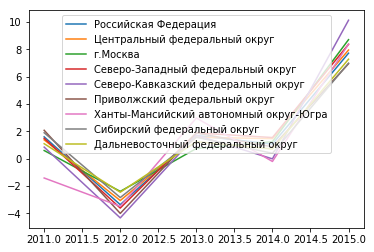

In [96]:
df2r.plot()

<div class="msg-block msg-info">
  <p class="msg-text-info">В расчетах используйте следующий показатель: <i>период с начала отчетного года в % к соответствующему периоду предыдущего года </i></p>
</div>

<p><b>Задача 3.</b> Найти индексы реальной заработной платы, построить график изменения индекса в процентах (год-изменение индекса в %) </p>

In [ ]:
# Структура вывода
df_result_3 = pnd.DataFrame("Значение", 
                            columns = ["Индекс реальной зарплаты"], 
                            index = range(2003, 2015))

df_result_3

<p><b>Задача 4.</b> Отобразить все три индекса на одном графике</p>

In [ ]:
# Структура вывода
df_result_4 = pnd.DataFrame("Значение", 
                            columns = ["Индекс номинальной зарплаты", 
                                       "Индекс потребительских цен", 
                                       "Индекс реальной зарплаты"], 
                            index = range(2003, 2015))

df_result_4

<a name="2"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">2. Варианты</div>
    	<div style="display:table-cell; width:20%; text-align:center; background-color:whitesmoke; border:1px solid lightgrey"><a href="#0">К содержанию</a></div>
    </div>
</div>

<p>Чтобы узнать свой вариант, введите Вашу фамилию в соответствующее поле ниже и запустите ячейку:</p>

In [ ]:
surname = "Иванов"  # Ваша фамилия

alph = 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя'
w = [6, 31, 38, 29, 29, 20, 16,  4, 34,  3, 39, 33, 36, 33, 20,  3, 22,
       31,  3, 34, 16, 25, 25, 25, 23, 13, 35, 19, 20, 26, 34, 39,  8]
d = dict(zip(alph, w))
variant =  sum([d[el] for el in surname.lower()]) % 9 + 1
print("Ваш вариант - ", variant)

<p>Задание необходимо выполнить в соответствии с вариантом. Соотнесение вариантов и округов, субъектов РФ для расчета следующее:<br>
<ol>
<li>Российская Федерация</li>
<li>Центральный федеральный округ</li>
<li>г.Москва</li>
<li>Северо-Западный федеральный округ</li>
<li>Северо-Кавказский федеральный округ</li>
<li>Приволжский федеральный округ</li>
<li>Ханты-Мансийский автономный округ-Югра</li>
<li>Сибирский федеральный округ</li>
<li>Дальневосточный федеральный округ</li>
</ol>
</p>